# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Step 1 : Reading and Understanding Data

In [2]:
# Read the data
boombikes = pd.read_csv("day.csv")

In [3]:
# Checking top 5 records
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking data shape
# Conclusion - There are 730 rows and 16 columns present in dataset
boombikes.shape

(730, 16)

In [5]:
# Columns, Null count and Dtype check
# Conclusion - There are no null values present in dataset
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for any null values
# Conclusion - There are no null values present in dataset
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Statistical check
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
## Dropping unnecessary columns
   # Looks like cnt is sum of casual and registered so dropping both
   # yr and mnth are already present in dataset so dropping dteday column
   # instant is index so dropping that aslo

boombikes.drop(["casual","registered","dteday","instant"], axis=1, inplace=True)

In [9]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Transform weathersit feature
boombikes["weathersit"] = boombikes["weathersit"].map({1:"Clear to Partly Cloudy", 2:"Misty and Cloudy", 3:"Light Rain or Snow"})

# Transform weekday feature
boombikes["weekday"] = boombikes["weekday"].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

# Transform season feature
boombikes["season"] = boombikes["season"].map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})

# Transform mnth feature
boombikes["mnth"] = boombikes["mnth"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})

In [11]:
# Checking transformed features
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualisation

### Univariate Analysis

In [12]:
num_var_list = ["temp","atemp","hum","windspeed","cnt"]
cat_var_list = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

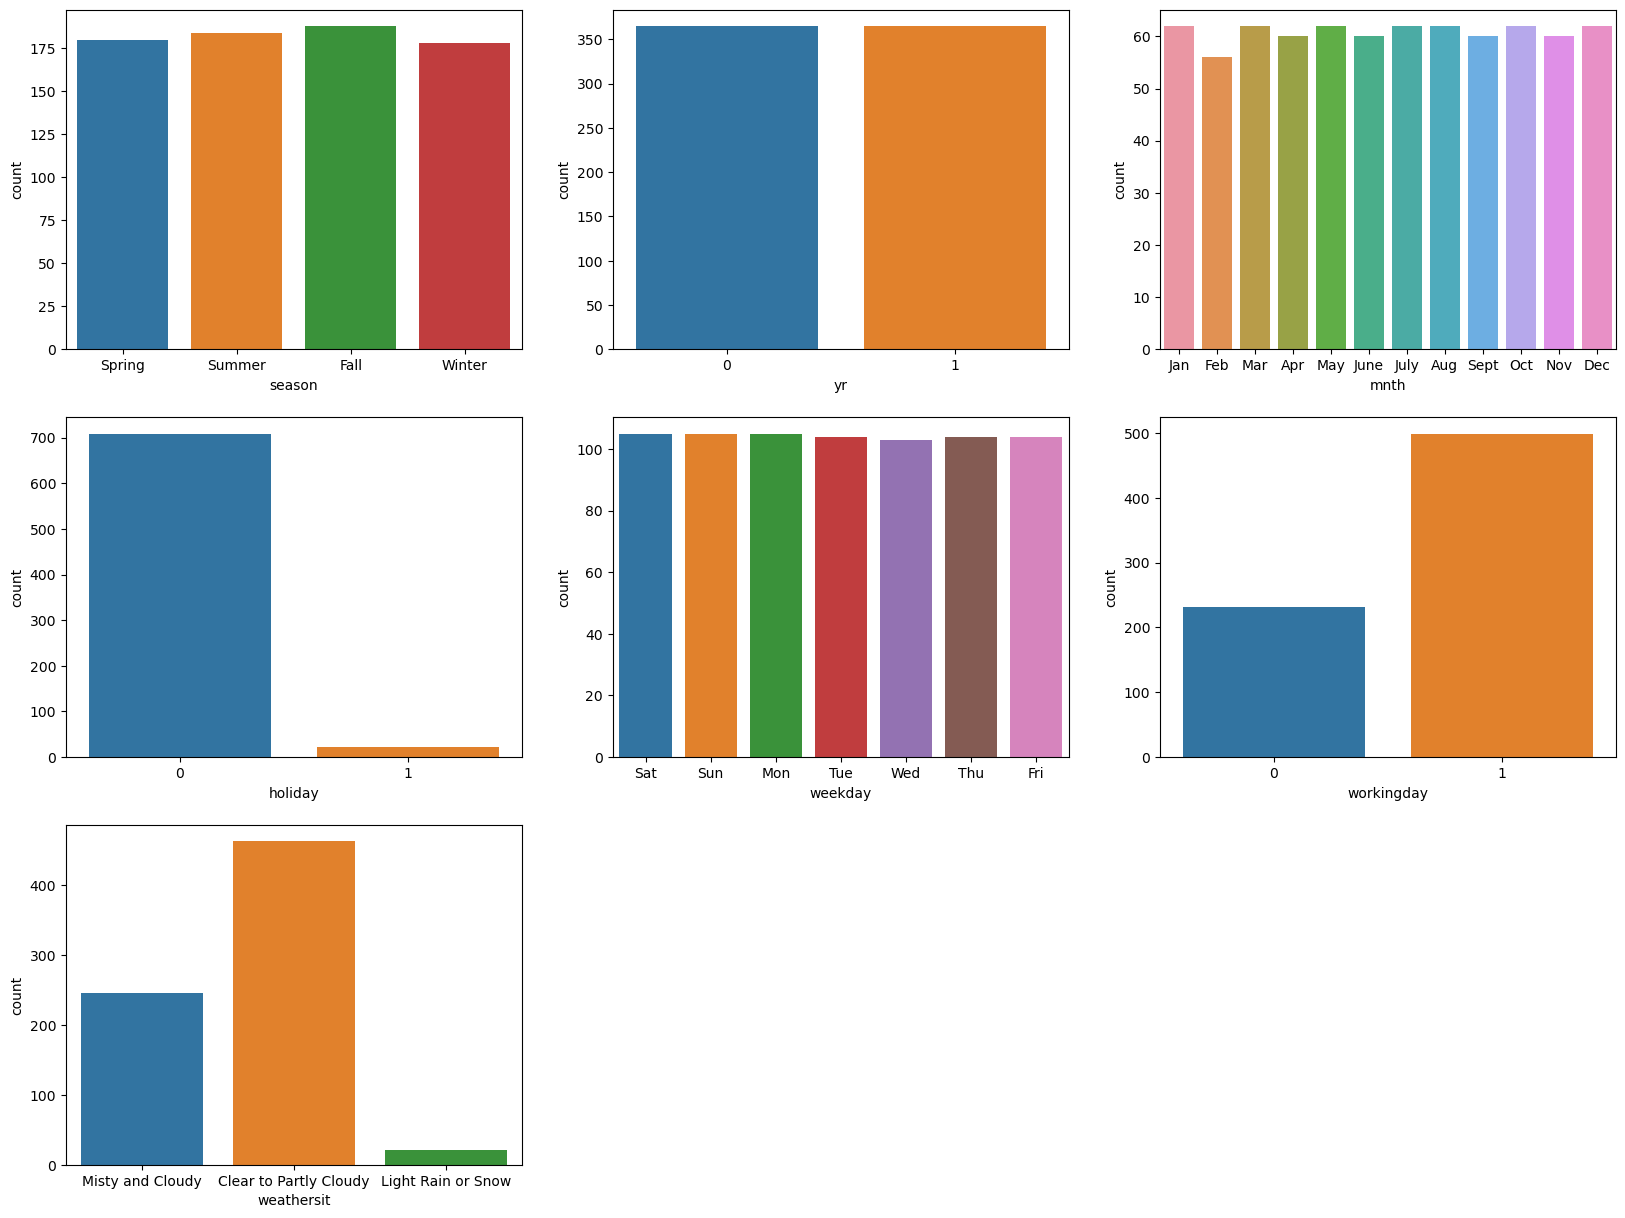

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(x=boombikes["season"])

plt.subplot(3,3,2)
sns.countplot(x=boombikes["yr"])

plt.subplot(3,3,3)
sns.countplot(x=boombikes["mnth"])

plt.subplot(3,3,4)
sns.countplot(x=boombikes["holiday"])

plt.subplot(3,3,5)
sns.countplot(x=boombikes["weekday"])

plt.subplot(3,3,6)
sns.countplot(x=boombikes["workingday"])

plt.subplot(3,3,7)
sns.countplot(x=boombikes["weathersit"])

plt.show()

# Univariate Analysis Conclusions
1)Most of the days are clear to partly cloudy

2)There are more working days than Holiday/Weekends

3)All month,year,season and weekdays having same days as per calender

## Bivariate Analysis

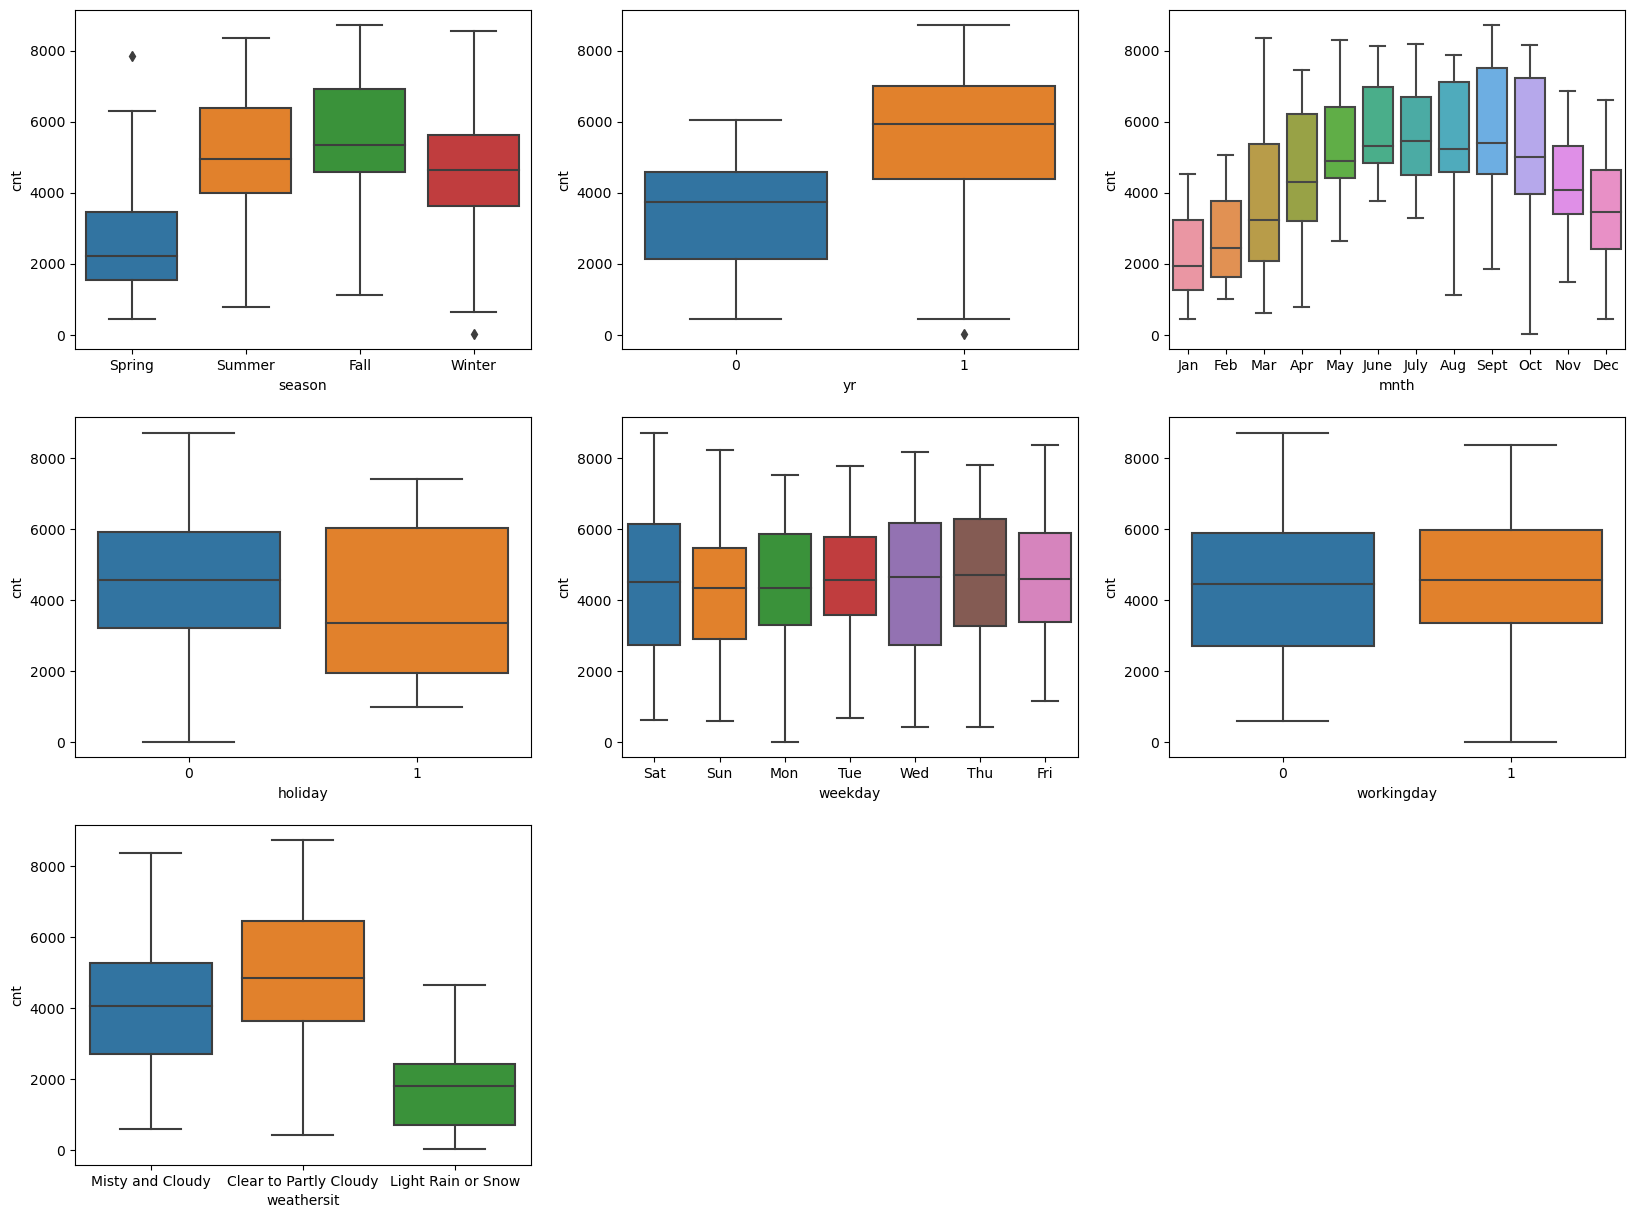

In [14]:
# Visualising Categorical Data (Bivariate analysis using Boxplot)
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", data=boombikes)

plt.subplot(3,3,2)
sns.boxplot(x="yr", y="cnt", data=boombikes)

plt.subplot(3,3,3)
sns.boxplot(x="mnth", y="cnt", data=boombikes)

plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", data=boombikes)

plt.subplot(3,3,5)
sns.boxplot(x="weekday", y="cnt", data=boombikes)

plt.subplot(3,3,6)
sns.boxplot(x="workingday", y="cnt", data=boombikes)

plt.subplot(3,3,7)
sns.boxplot(x="weathersit", y="cnt", data=boombikes)

plt.show()

# Bivariate Analysis Conclusions
1)Bike demand more in Fall season followed by summer season

2)In 2019 there are more rental bike users than in 2018

3)There are more rental bike users when wheather is clear to partly cloudy

4)There is not even single day on which heavy rain/snow has occured

5)Usage of bike on weekdays is slighlty highrer than holidays

6)Usage of bike is similiar irrespective of being working day or not

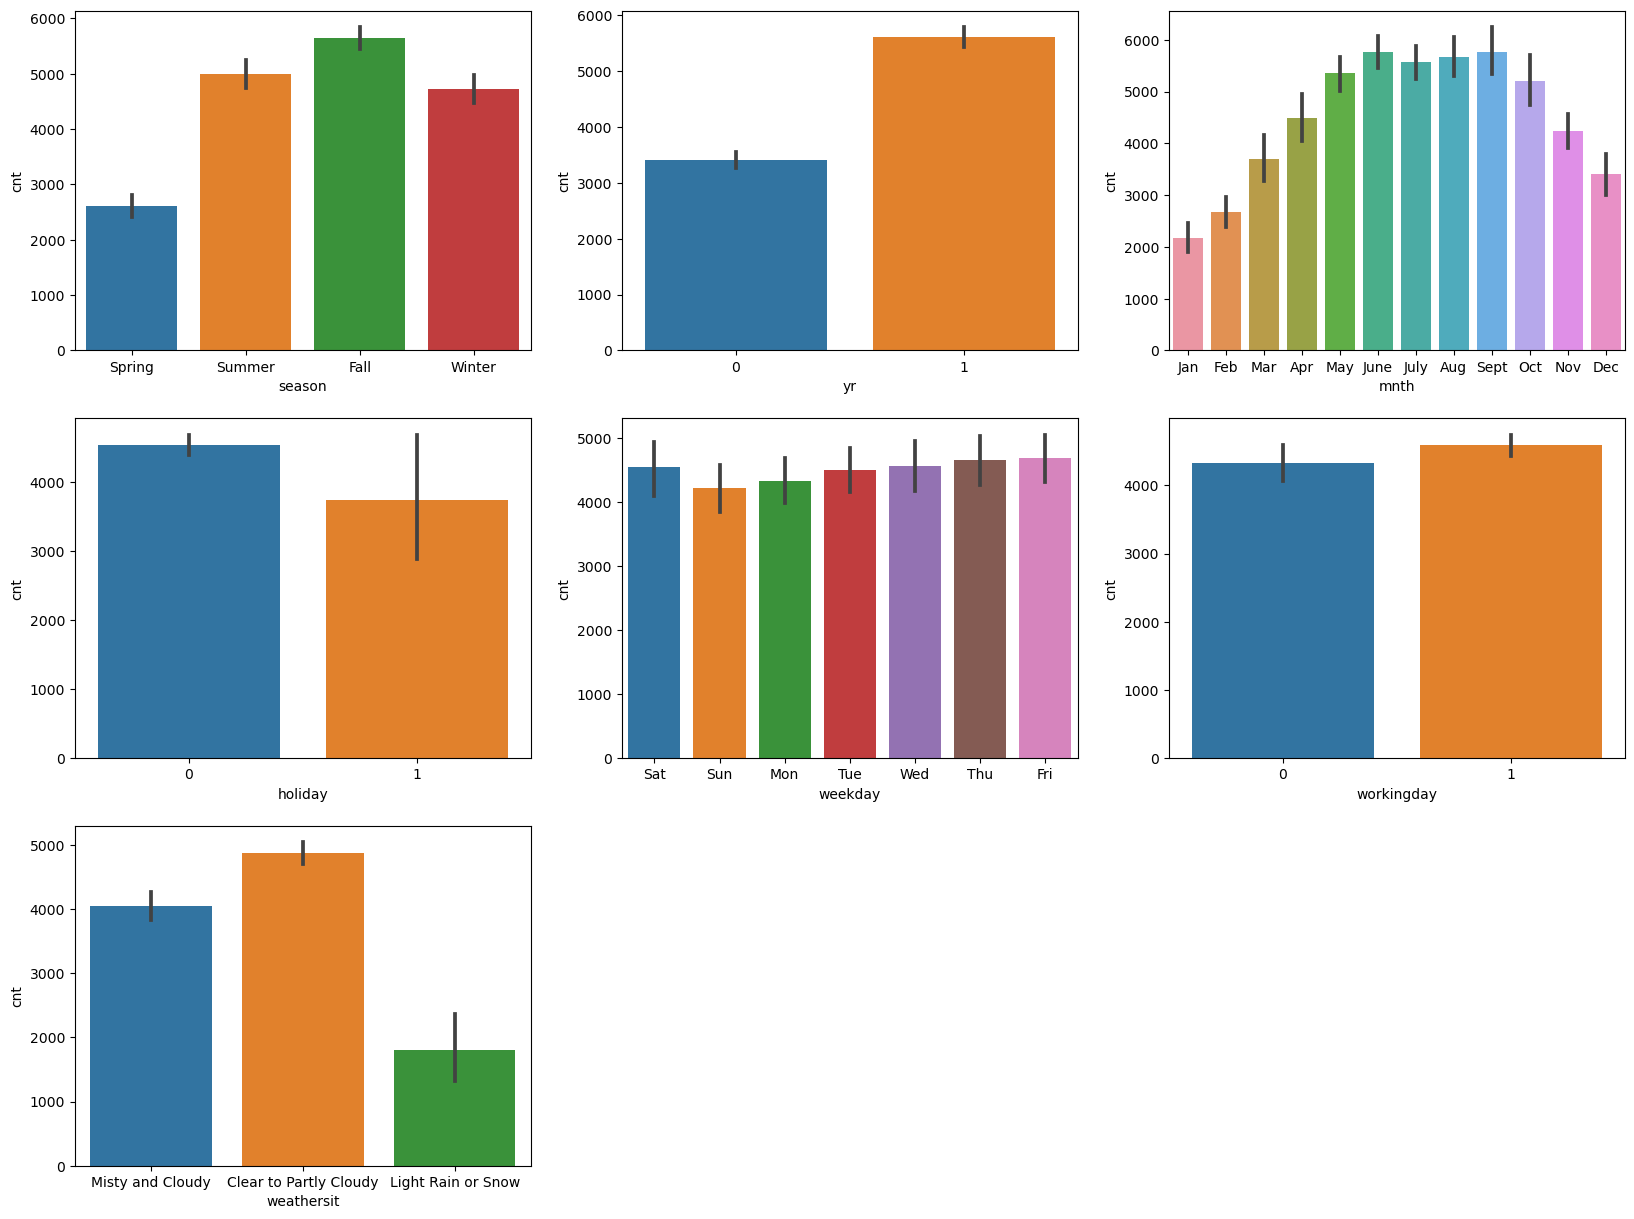

In [15]:
# Visualising Categorical Data (Bivariate analysis using Barplot)
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.barplot(x="season", y="cnt", data=boombikes)

plt.subplot(3,3,2)
sns.barplot(x="yr", y="cnt", data=boombikes)

plt.subplot(3,3,3)
sns.barplot(x="mnth", y="cnt", data=boombikes)

plt.subplot(3,3,4)
sns.barplot(x="holiday", y="cnt", data=boombikes)

plt.subplot(3,3,5)
sns.barplot(x="weekday", y="cnt", data=boombikes)

plt.subplot(3,3,6)
sns.barplot(x="workingday", y="cnt", data=boombikes)

plt.subplot(3,3,7)
sns.barplot(x="weathersit", y="cnt", data=boombikes)

plt.show()

# Bivariate Analysis Conclusions
1)Bike demand more in Fall season followed by summer season

2)In 2019 there are more rental bike users than in 2018

3)There are more rental bike users when wheather is clear to partly cloudy

4)There is not even single day on which heavy rain/snow has occured

5)Usage of bike on weekdays is slighlty highrer than holidays

6)Usage of bike is similiar irrespective of being working day or not

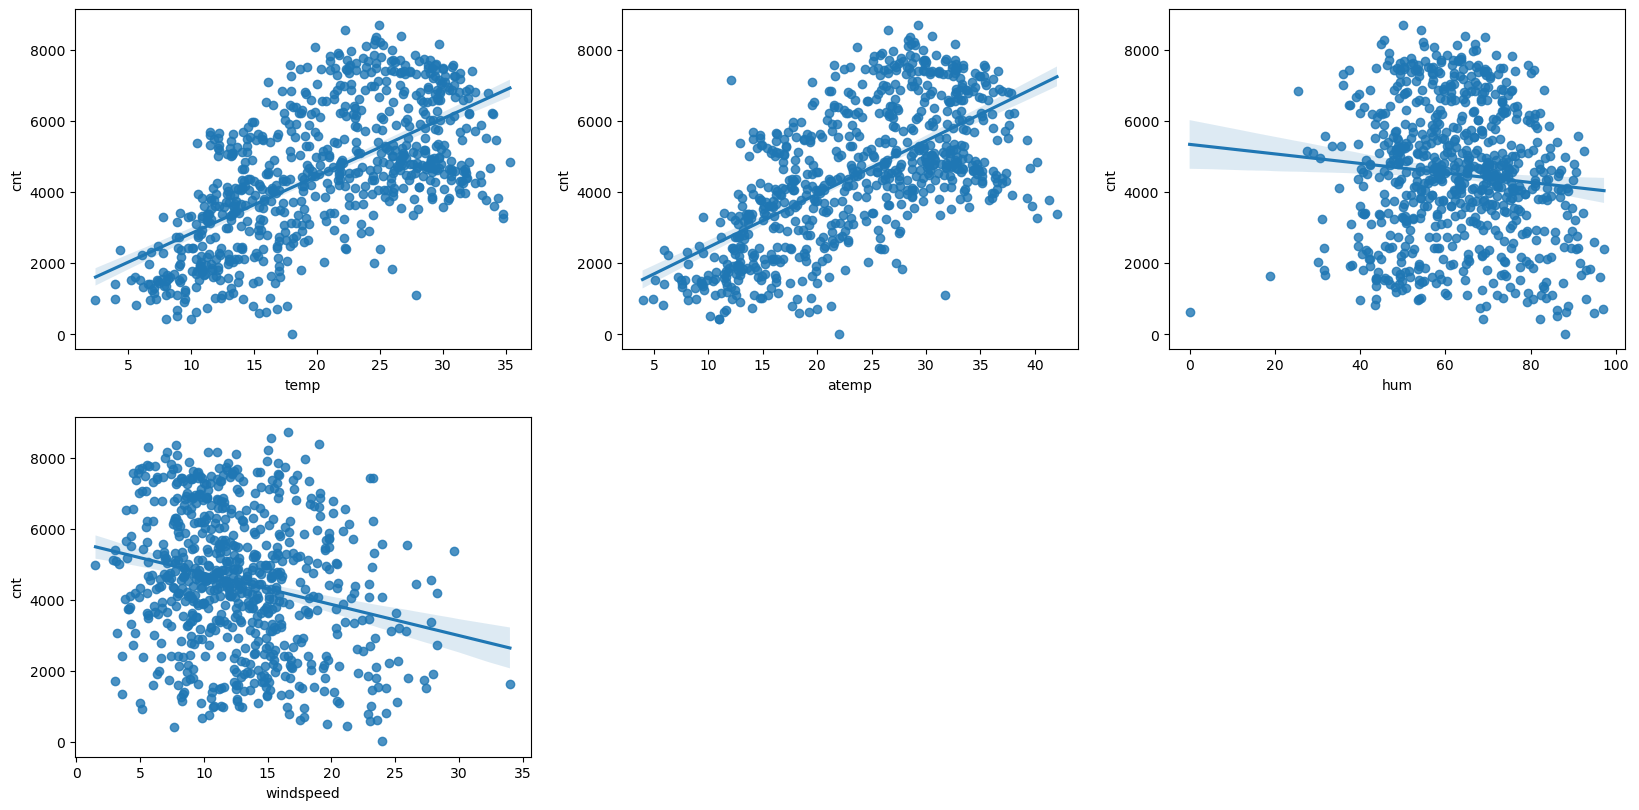

In [16]:
# Visualising Numerical Data (Scatter Plot)
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.regplot(x="temp", y="cnt", data=boombikes)

plt.subplot(3,3,2)
sns.regplot(x="atemp", y="cnt", data=boombikes)

plt.subplot(3,3,3)
sns.regplot(x="hum", y="cnt", data=boombikes)

plt.subplot(3,3,4)
sns.regplot(x="windspeed", y="cnt", data=boombikes)

plt.show()

# Bivariate Analysis Conclusions 
1) There is direct relation between bike demand and temp/atemp

2) There is inverse relation between bike demand and hum/windspeed

# Step 2 : Preparing Data For Modelling

## Creating Dummy Variables

In [17]:
boombikes = pd.get_dummies(boombikes, drop_first=True, dtype=int)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## train_test_split (70% training, 30% test)

In [18]:
df_train, df_test = train_test_split(boombikes, train_size=0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling (Min/Max)

In [19]:
scaler = MinMaxScaler()

In [20]:
num_var_list = ["temp","atemp","hum","windspeed","cnt"]

df_train[num_var_list] = scaler.fit_transform(df_train[num_var_list])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df_train[num_var_list].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3 : Training The Model

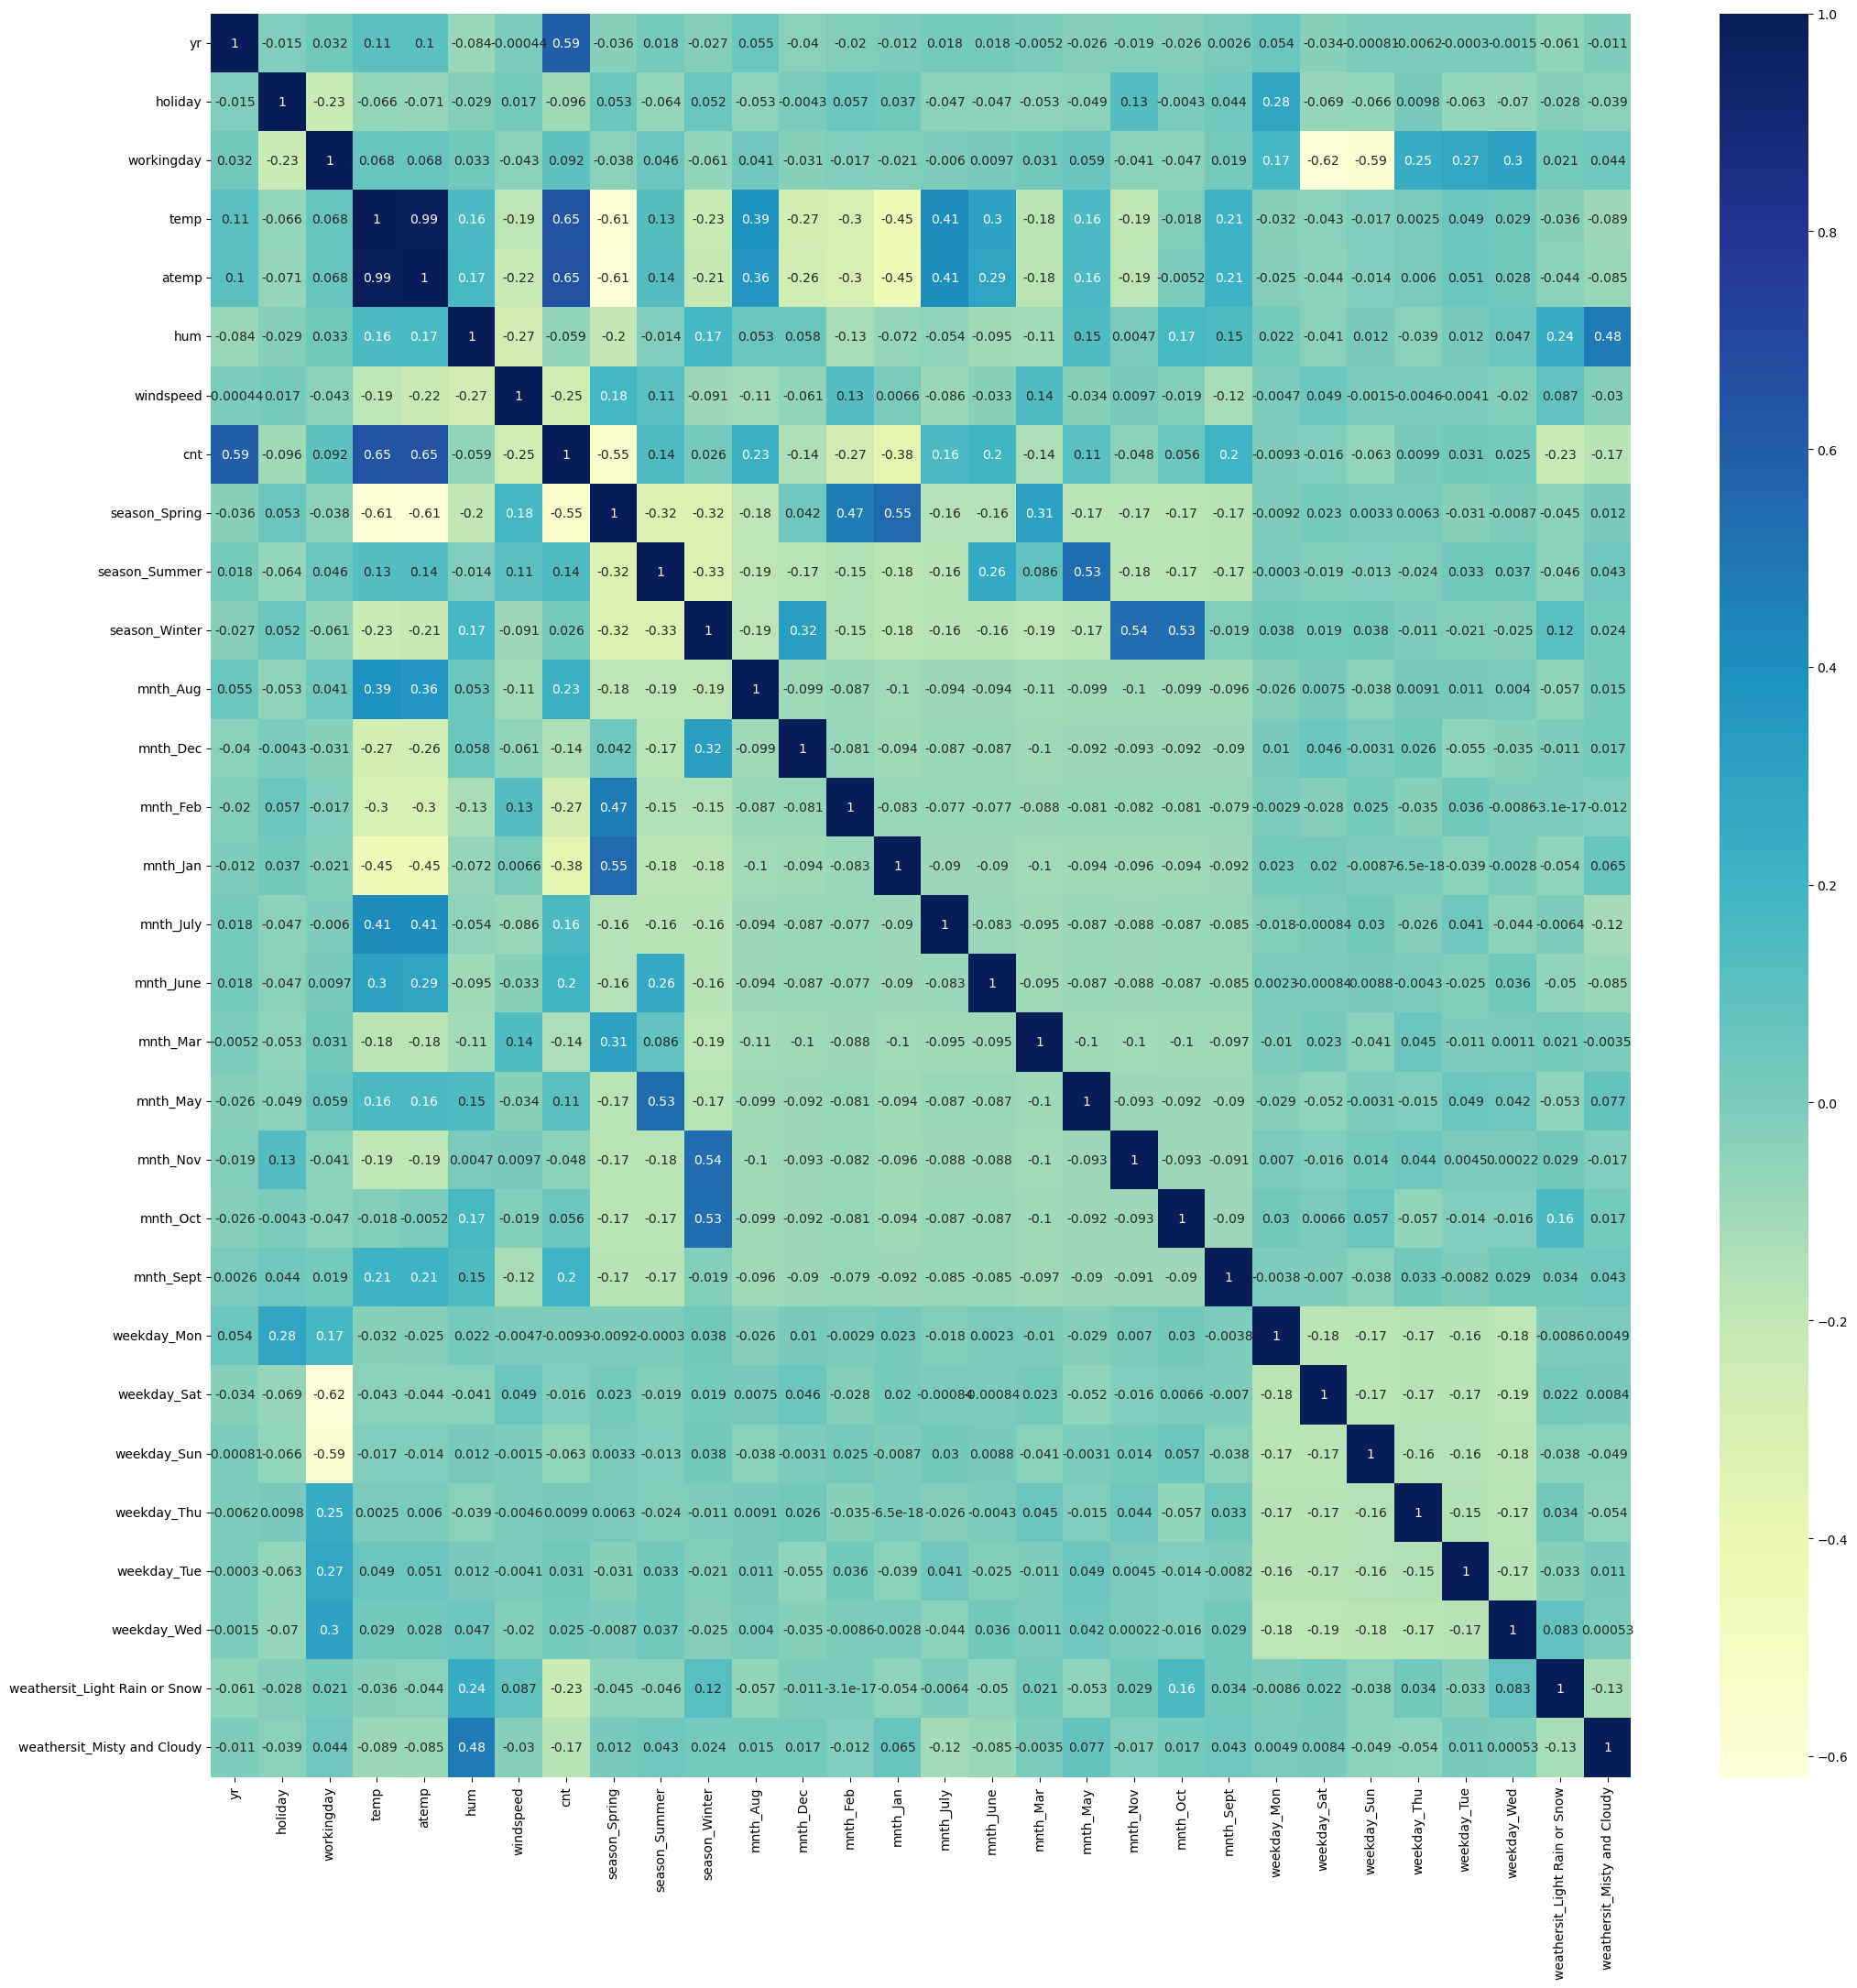

In [22]:
# Heatmap to see correlation between variables
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [23]:
df_train.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1


## Define training and test dataset

In [24]:
# X_train, y_train

y_train = df_train.pop("cnt")
X_train = df_train

# Variable selection using RFE (Top 10 varibales selected)

In [25]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Rain or Snow',
       'weathersit_Misty and Cloudy'],
      dtype='object')

In [26]:
# Creating an instance of LinearRegression
lm = LinearRegression()

# Fitting model with X_train and y_train
lm.fit(X_train, y_train)

# Creating RFE instance on fitted lm
rfe = RFE(lm, n_features_to_select = 10) #top 10 variable selection

# Converting rfe to fitted rfe
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', False, 2),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_July', True, 1),
 ('mnth_June', False, 19),
 ('mnth_Mar', False, 20),
 ('mnth_May', False, 11),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 18),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 13),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 15),
 ('weekday_Wed', False, 17),
 ('weathersit_Light Rain or Snow', True, 1),
 ('weathersit_Misty and Cloudy', False, 3)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_July', 'mnth_Sept',
       'weathersit_Light Rain or Snow'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_Spring', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Misty and Cloudy'],
      dtype='object')

In [30]:
X_train_rfe = X_train[col]

In [31]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.79e-186
Time:                        21:05:47   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# VIF

In [34]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,const,40.19
3,temp,1.53
8,mnth_July,1.43
6,season_Summer,1.33
7,season_Winter,1.28
4,hum,1.26
9,mnth_Sept,1.19
5,windspeed,1.16
10,weathersit_Light Rain or Snow,1.11
1,yr,1.03


# Residual Analysis of the training data

In [35]:
y_train_pred = lm.predict(X_train_rfe)

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_19840\455321328.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins=20)


Text(0.5, 0, 'Errors')

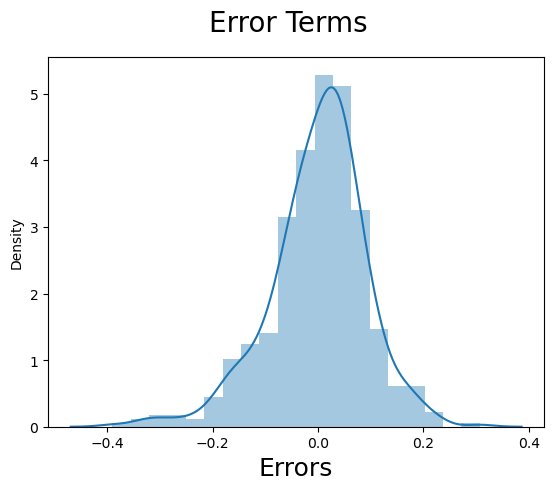

In [36]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

## Conclusion on training data -

1)All top 10 variables have VIF less than 5

2)All top 10 varibales have P-value less than 0.05

3)R-squared = 0.832

4)Adj. R-squared = 0.829

5)Error terms are normally distributed for training data set

# Step 4 - Prediction and Evaluation on test set

In [37]:
num_var_list = ["temp","atemp","hum","windspeed","cnt"]

df_test[num_var_list] = scaler.transform(df_test[num_var_list])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [38]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Snow,weathersit_Misty and Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y_test = df_test.pop("cnt")
X_test = df_test

In [40]:
# Creating an instance of LinearRegression
lm = LinearRegression()

# Fitting model with X_train and y_train
lm.fit(X_test, y_test)

# Creating RFE instance on fitted lm
rfe = RFE(lm, n_features_to_select = 10)

# Converting rfe to fitted rfe
rfe = rfe.fit(X_test, y_test)

In [41]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 16),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 9),
 ('season_Winter', False, 3),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 15),
 ('mnth_Jan', False, 14),
 ('mnth_July', False, 4),
 ('mnth_June', False, 10),
 ('mnth_Mar', False, 5),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', True, 1),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 12),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 17),
 ('weekday_Thu', False, 19),
 ('weekday_Tue', False, 18),
 ('weekday_Wed', False, 20),
 ('weathersit_Light Rain or Snow', True, 1),
 ('weathersit_Misty and Cloudy', False, 11)]

In [42]:
X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)
lm = sm.OLS(y_test, X_test_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     92.98
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           2.78e-71
Time:                        21:05:48   Log-Likelihood:                 208.78
No. Observations:                 220   AIC:                            -395.6
Df Residuals:                     209   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Residual Analysis of the test data

In [43]:
y_test_pred = lm.predict(X_test_rfe)

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_19840\1376692893.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_test_pred), bins=20)


Text(0.5, 0, 'Errors')

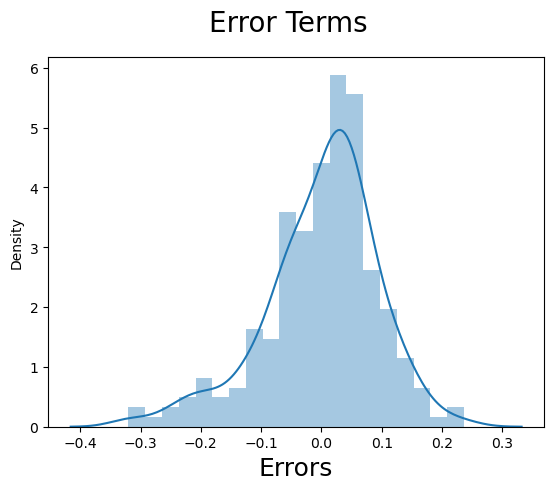

In [44]:
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins=20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8164810308188603

## Conclusion on test data - 
1)R-squared = 0.816

2)Adj. R-squared = 0.808

3)Error terms are normally distributed for test data set


# Final Counclusions - 

1)There are 730 rows and 16 columns present in dataset

2)Most of the days are clear to partly cloudy

3)All month,year,season and weekdays having same days as per calender

4)Bike demand more is in Fall season followed by summer season

5)In 2019 there are more rental bike users than in 2018

6)There are more rental bike users when wheather is clear to partly cloudy

7)There is not even single day on which heavy rain/snow has occured

8)Usage of bike on weekdays is slighlty highrer than holidays

9)Usage of bike is similiar irrespective of being working day or not

10)There is direct relation between bike demand and temp/atemp

11)There is inverse relation between bike demand and hum/windspeed

12)Training Data set Stats - 1)R-squared = 0.832

                    2)Adj. R-squared = 0.829

                    3)Error terms are normally distributed for training data set
13)Testing Data set Stats - 1)R-squared = 0.816

                   2)Adj. R-squared = 0.808

                   3)Error terms are normally distributed for test data set
                   
14)R-squared and Adj. R-squared values for both training and test data is almost same

15)Linear Regression Model (Line of best fit) - Based on Training data set

cnt = 0.2259*yr - 0.0930*holiday + 0.6200*temp - 0.2868*hum - 0.2059*windspeed + 0.0800*season_Summer + 0.1390*season_Winter - 0.0482*mnth_July + 0.0944*mnth_Sept - 0.1914*weathersit_Light Rain or Snow + 0.2682 

# End